In [2]:
!pip install anndata
!pip install 'scanpy[leiden]'
!pip install 'scanpy[louvain]'

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=720b81db93b11d9727361d2d7c2652fff1a03096209614eb8a39e4b742f957e8
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00


In [3]:
import scanpy as sc
extract_dir = "/content/drive/MyDrive/5243/Project1/"
adata = sc.read_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [5]:
adata.obs.head()

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3


In [102]:
# Define the mapping of cluster names to broader categories
cluster_to_main_category = {
    # ROCs
    'ROCs': 'ROCs',

    # Epidermis
    'Epidermis': 'Epidermis',

    # Neural Progenitor and related neuron clusters
    'Differentiating neuron': 'Neural Progenitor',
    'Dopaminergic neurons': 'Neural Progenitor',
    'Motor neuron': 'Neural Progenitor',
    'Interneuron 1': 'Neural Progenitor',
    'Interneuron 2': 'Neural Progenitor',
    'Interneuron 3': 'Neural Progenitor',
    'Interneuron 4': 'Neural Progenitor',
    'Spinal cord progenitor': 'Neural Progenitor',
    'Vulnerable Motor Neuron': 'Neural Progenitor',

    # Immune-related clusters
    'Lymphoid 1 (Gata2-, Gata3+)': 'Immune',
    'Lymphoid 2 (Cxcr6+)': 'Immune',
    'Lymphoid 3': 'Immune',
    'Lymphoid 4 (Gata2+, Gata3-)': 'Immune',
    'Lymphoid 5 (CD19+)': 'Immune',
    'Lymphoid endothelial cells': 'Immune',
    'Myeloid 1': 'Immune',
    'Myeloid 2': 'Immune',
}

## 0 DPA

### PCA + Leiden

In [6]:
adata_0dpa = adata[adata.obs['DaysPostAmputation'] == 0] # Subset on the time point 0
adata_0dpa.layers['counts'] = adata_0dpa.X.copy() # Copy the raw counts in a different layer

<ipython-input-6-a50c1d84199d>:2: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata_0dpa.layers['counts'] = adata_0dpa.X.copy() # Copy the raw counts in a different layer


In [7]:
hvg_adata_0dpa = sc.pp.log1p(adata_0dpa, copy=True) # Log-normalize the data
sc.pp.highly_variable_genes(hvg_adata_0dpa, n_top_genes=2000) # Select highly variable genes
hvg_adata_0dpa = hvg_adata_0dpa[:, hvg_adata_0dpa.var['highly_variable']] # Subset on highly variable genes

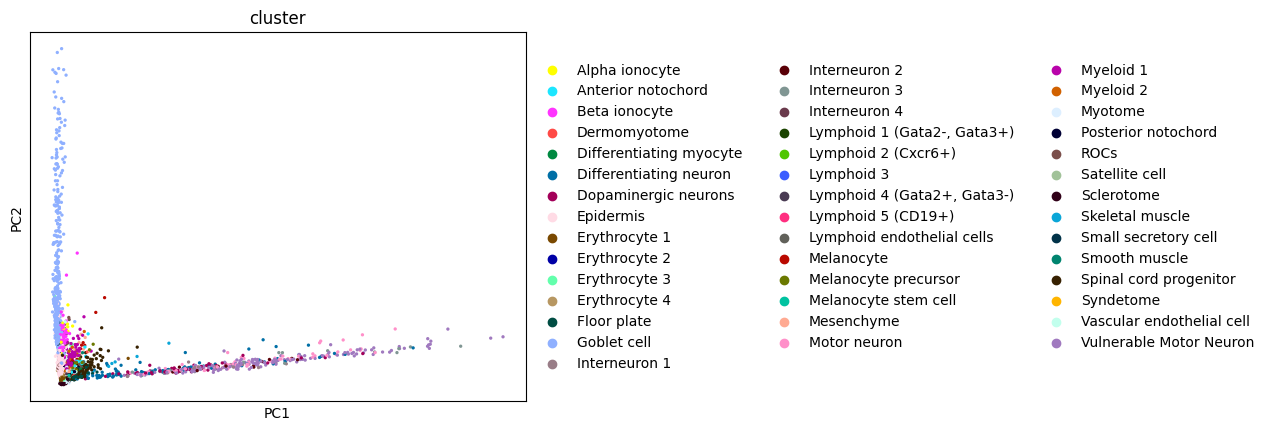

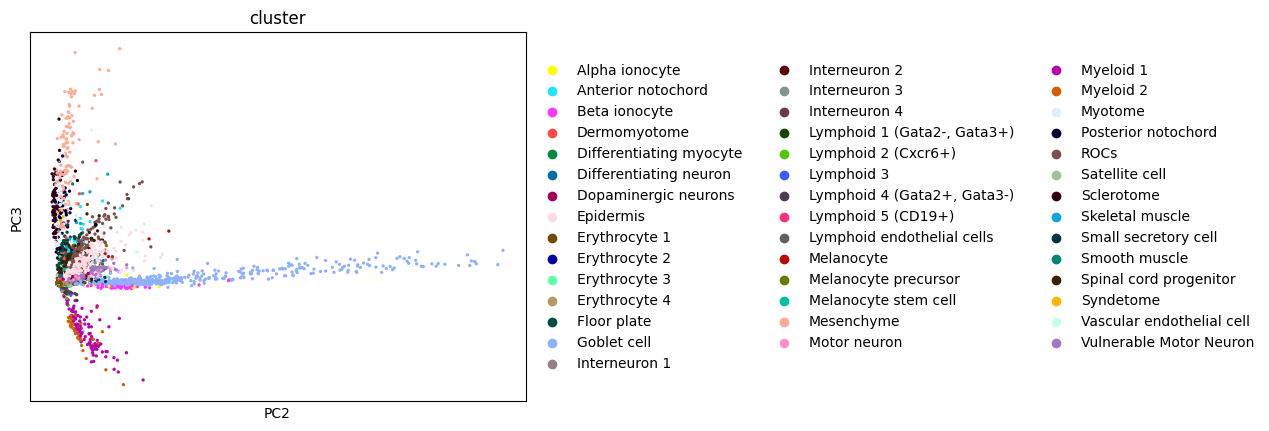

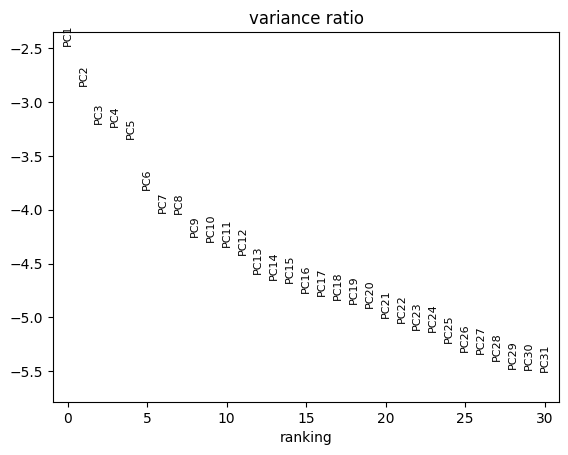

In [8]:
# PCA on scaled data
hvg_adata_0dpa_scaled = hvg_adata_0dpa.copy()
sc.pp.scale(hvg_adata_0dpa_scaled) # Scale data

# Do PCA on the highly variable genes data - you might need to lognormalize to select HVG
sc.tl.pca(hvg_adata_0dpa_scaled, svd_solver='arpack')
sc.pp.pca(hvg_adata_0dpa_scaled)

sc.pl.pca(hvg_adata_0dpa_scaled, color='cluster', components= ['1,2'])
sc.pl.pca(hvg_adata_0dpa_scaled, color='cluster', components= ['2,3']) # Plot all diagnostics including PC1 against PC2 and PC2 against PC3
sc.pl.pca_variance_ratio(hvg_adata_0dpa_scaled, log=True) # Plot the variance ratio

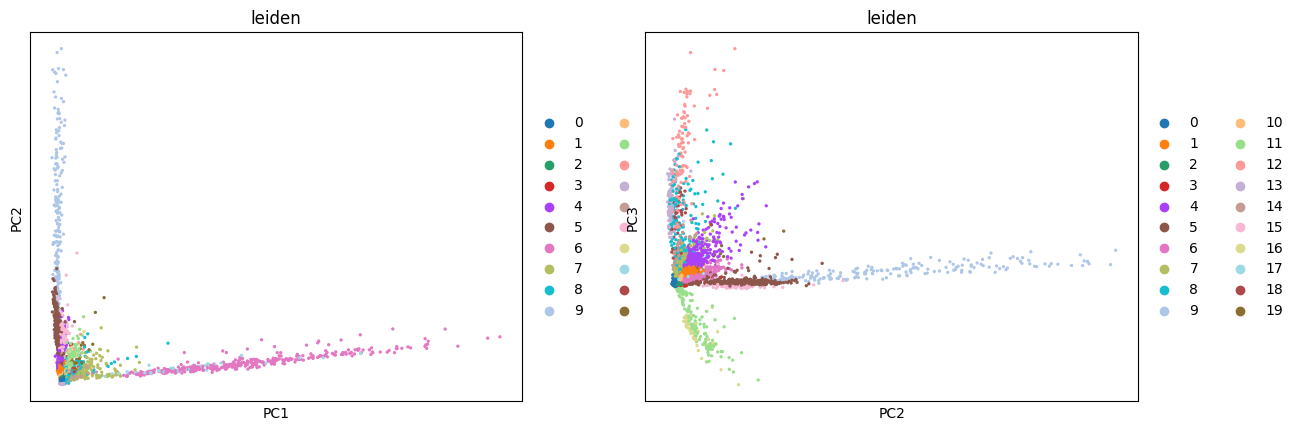

In [101]:
# Leiden on scaled data
# Whitening step - create neighbors graph based on PCA
sc.pp.neighbors(hvg_adata_0dpa_scaled, n_pcs=15) # Create neighbors graph - n_pcs takes the number of principal components from PCA you keep for this step
sc.tl.leiden(hvg_adata_0dpa_scaled, resolution=0.5)  # Apply Leiden clustering, you can adjust the resolution parameter
sc.pl.pca(hvg_adata_0dpa_scaled, color=['leiden'], components= ['1,2', '2,3'])

In [121]:
import pandas as pd

# Create a contingency table to compare Leiden clusters and main categories
contingency_table = pd.crosstab(hvg_adata_0dpa_scaled.obs['leiden'], hvg_adata_0dpa_scaled.obs['main_category'])
print("Contingency Table for Leiden Clusters and Main Categories:")
print(contingency_table)

Contingency Table for Leiden Clusters and Main Categories:
main_category  Epidermis  Immune  Neural Progenitor  Other  ROCs
leiden                                                          
0                      3       1                  2   1187     2
1                    518       1                  1      3    18
2                      0       0                  0    476     0
3                      0       0                  0    421     0
4                    232       0                  0      0   151
5                     14       0                  1    360     0
6                      0       0                347      0     0
7                      1       0                325      4     0
8                      1       4                  4    214     1
9                      0       0                  0    212     0
10                   150       0                  0     10     0
11                     0     129                  0      4     0
12                     0       

In [107]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, rand_score, silhouette_score

# Get the true labels (main categories) and predicted labels (Leiden clusters)
true_labels = hvg_adata_0dpa_scaled.obs['main_category']
predicted_labels = hvg_adata_0dpa_scaled.obs['leiden']

# Ensure that both are categorical
true_labels = true_labels.astype('category')
predicted_labels = predicted_labels.astype('category')

In [108]:
# Compute Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

# Compute Normalized Mutual Information (NMI)
nmi_score = normalized_mutual_info_score(true_labels, predicted_labels)
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")

# Compute Homogeneity Score
homogeneity = homogeneity_score(true_labels, predicted_labels)
print(f"Homogeneity Score: {homogeneity:.4f}")

# Compute the unadjusted Rand Index (RI) between true labels and predicted labels
ri_score = rand_score(true_labels, predicted_labels)
print(f"Rand Index (RI): {ri_score:.4f}")

# Use PCA coordinates for silhouette score calculation
pca_coords = hvg_adata_0dpa_scaled.obsm['X_pca']  # Replace with 'X_umap' if using UMAP coordinates

# Compute silhouette score using the PCA coordinates and the predicted Leiden clusters
silhouette = silhouette_score(pca_coords, predicted_labels)
print(f"Silhouette Score (PCA coordinates): {silhouette:.4f}")

Adjusted Rand Index (ARI): 0.2277
Normalized Mutual Information (NMI): 0.5285
Homogeneity Score: 0.8870
Rand Index (RI): 0.6519
Silhouette Score (PCA coordinates): 0.1870


### Louvain

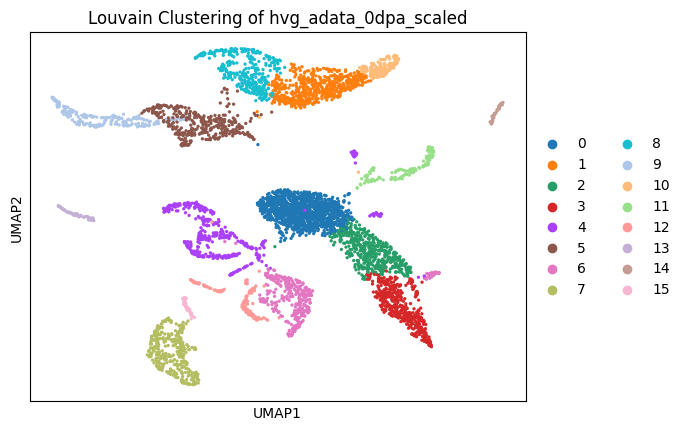

In [12]:
# Construct the kNN graph using PCA components
sc.pp.neighbors(hvg_adata_0dpa_scaled, n_pcs=15)  # Adjust n_neighbors and n_pcs as needed

# Perform Louvain clustering on the kNN graph
sc.tl.louvain(hvg_adata_0dpa_scaled, resolution=0.5)  # Adjust the resolution parameter to control cluster size

# Visualize Louvain clusters using UMAP
sc.tl.umap(hvg_adata_0dpa_scaled)  # Compute UMAP embedding
sc.pl.umap(hvg_adata_0dpa_scaled, color='louvain', title='Louvain Clustering of hvg_adata_0dpa_scaled')

In [111]:
# Create a contingency table between Louvain clusters and main categories
contingency_table_louvain = pd.crosstab(hvg_adata_0dpa_scaled.obs['louvain'], hvg_adata_0dpa_scaled.obs['main_category'])
print("Contingency Table for Louvain Clusters and Main Categories:")
print(contingency_table_louvain)

Contingency Table for Louvain Clusters and Main Categories:
main_category  Epidermis  Immune  Neural Progenitor  Other  ROCs
louvain                                                         
0                      3       1                  2   1178     2
1                    560       1                  1      3    19
2                      0       0                  0    468     0
3                      0       0                  0    439     0
4                      1       4                  1    404     1
5                     14       0                  1    357     0
6                      1       0                325     35     0
7                      0       0                347      0     0
8                    190       0                  0      0   150
9                      0       0                  0    214     0
10                   150       1                  0     11     0
11                     0     128                  0      4     0
12                     0      

In [113]:
# Define true and predicted labels for clustering evaluation
true_labels = hvg_adata_0dpa_scaled.obs['main_category']
predicted_labels_louvain = hvg_adata_0dpa_scaled.obs['louvain']

# Compute Adjusted Rand Index (ARI)
ari_louvain = adjusted_rand_score(true_labels, predicted_labels_louvain)
print(f"Adjusted Rand Index (ARI) for Louvain: {ari_louvain:.4f}")

# Compute Normalized Mutual Information (NMI)
nmi_louvain = normalized_mutual_info_score(true_labels, predicted_labels_louvain)
print(f"Normalized Mutual Information (NMI) for Louvain: {nmi_louvain:.4f}")

# Compute Homogeneity Score
homogeneity_louvain = homogeneity_score(true_labels, predicted_labels_louvain)
print(f"Homogeneity Score for Louvain: {homogeneity_louvain:.4f}")

# Compute the unadjusted Rand Index (RI) between true labels and predicted labels
ri_score = rand_score(true_labels, predicted_labels_louvain)
print(f"Rand Index (RI): {ri_score:.4f}")

# Compute Silhouette Score using PCA coordinates
pca_coords = hvg_adata_0dpa_scaled.obsm['X_pca']
silhouette_louvain = silhouette_score(pca_coords, predicted_labels_louvain)
print(f"Silhouette Score (PCA coordinates) for Louvain: {silhouette_louvain:.4f}")

Adjusted Rand Index (ARI) for Louvain: 0.2369
Normalized Mutual Information (NMI) for Louvain: 0.5362
Homogeneity Score for Louvain: 0.8721
Rand Index (RI): 0.6556
Silhouette Score (PCA coordinates) for Louvain: 0.1536


### Marker Identificatioln

#### Logistic Regression

In [17]:
hvg_adata_0dpa_scaled.obs.columns

Index(['barcode_cells', 'cell', 'sample', 'DevelopmentalStage',
       'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample',
       'Lane', 'Condition', 'batch', 'leiden', 'louvain'],
      dtype='object')

In [19]:
import numpy as np

# Get unique values using np.unique
unique_clusters_np = np.unique(hvg_adata_0dpa_scaled.obs['cluster'])
print("Unique cluster names in 'cluster' column:", unique_clusters_np)

Unique cluster names in 'cluster' column: ['Alpha ionocyte' 'Anterior notochord' 'Beta ionocyte' 'Dermomyotome'
 'Differentiating myocyte' 'Differentiating neuron' 'Dopaminergic neurons'
 'Epidermis' 'Erythrocyte 1' 'Erythrocyte 2' 'Erythrocyte 3'
 'Erythrocyte 4' 'Floor plate' 'Goblet cell' 'Interneuron 1'
 'Interneuron 2' 'Interneuron 3' 'Interneuron 4'
 'Lymphoid 1 (Gata2-, Gata3+)' 'Lymphoid 2 (Cxcr6+)' 'Lymphoid 3'
 'Lymphoid 4 (Gata2+, Gata3-)' 'Lymphoid 5 (CD19+)'
 'Lymphoid endothelial cells' 'Melanocyte' 'Melanocyte precursor'
 'Melanocyte stem cell' 'Mesenchyme' 'Motor neuron' 'Myeloid 1'
 'Myeloid 2' 'Myotome' 'Posterior notochord' 'ROCs' 'Satellite cell'
 'Sclerotome' 'Skeletal muscle' 'Small secretory cell' 'Smooth muscle'
 'Spinal cord progenitor' 'Syndetome' 'Vascular endothelial cell'
 'Vulnerable Motor Neuron']


In [90]:
# Map the cluster names to the defined categories and add a new column
hvg_adata_0dpa_scaled.obs['main_category'] = hvg_adata_0dpa_scaled.obs['cluster'].map(cluster_to_main_category)

# If there are clusters that do not belong to the specified categories, fill them as 'Other'
hvg_adata_0dpa_scaled.obs['main_category'].fillna('Other', inplace=True)

# Check the mapping to ensure it was applied correctly
print(hvg_adata_0dpa_scaled.obs[['cluster', 'main_category']].head(10))

                     cluster      main_category
1604  Differentiating neuron  Neural Progenitor
1605           Erythrocyte 1              Other
1606           Erythrocyte 3              Other
1607  Differentiating neuron  Neural Progenitor
1608           Erythrocyte 3              Other
1609           Erythrocyte 3              Other
1610           Erythrocyte 3              Other
1611           Erythrocyte 3              Other
1612  Differentiating neuron  Neural Progenitor
1613  Spinal cord progenitor  Neural Progenitor


<ipython-input-90-91e55646a805>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hvg_adata_0dpa_scaled.obs['main_category'].fillna('Other', inplace=True)


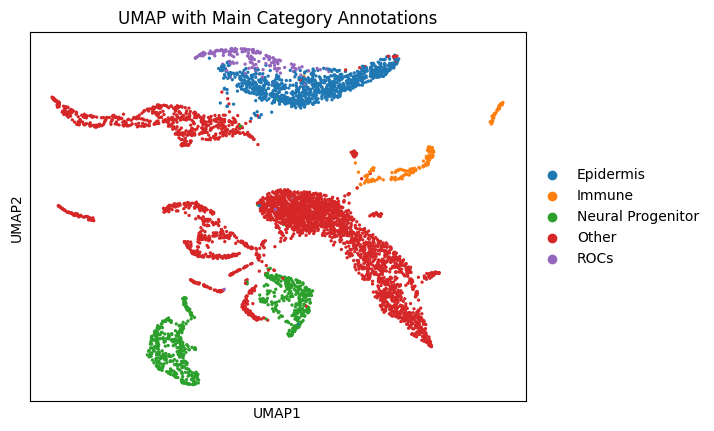

In [91]:
# Visualize the newly assigned main categories using UMAP
sc.pl.umap(hvg_adata_0dpa_scaled, color='main_category', title='UMAP with Main Category Annotations')

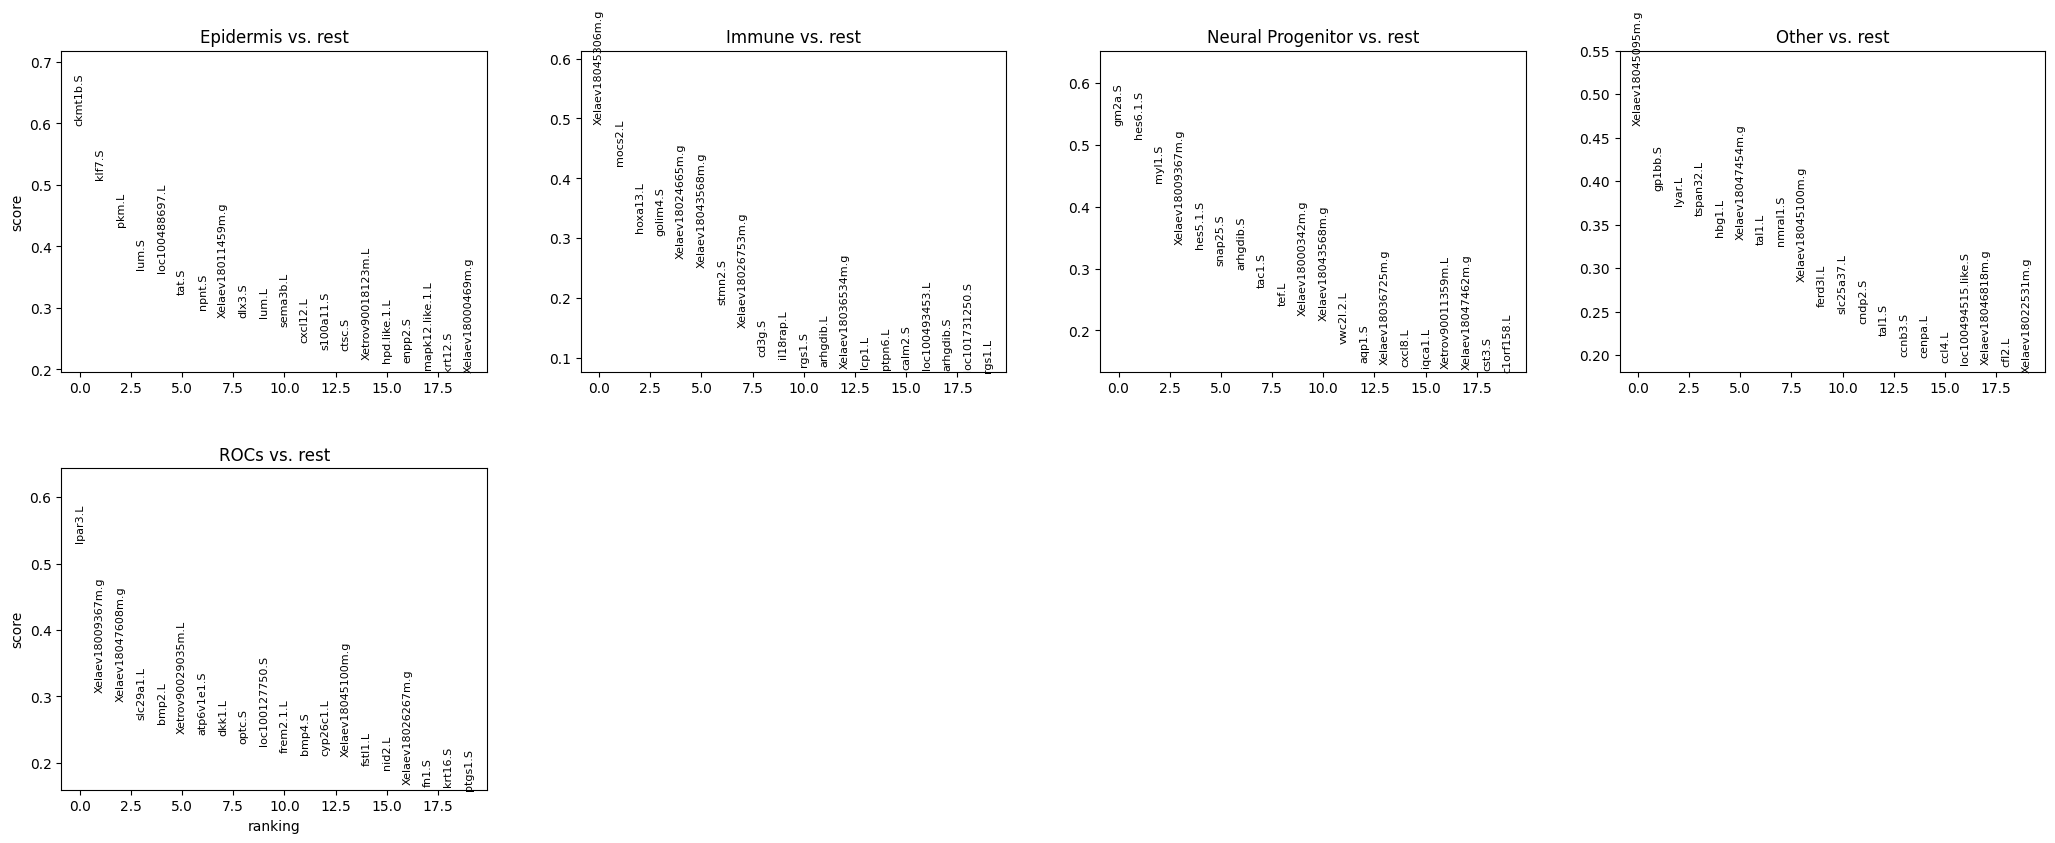

In [92]:
# Ensure the 'main_category' column is of categorical type
hvg_adata_0dpa_scaled.obs['main_category'] = hvg_adata_0dpa_scaled.obs['main_category'].astype('category')

# Perform logistic regression to identify marker genes for each main category
sc.tl.rank_genes_groups(hvg_adata_0dpa_scaled, groupby='main_category', method='logreg', key_added='logreg_main_category')

# Visualize the top marker genes for each main category identified by logistic regression
sc.pl.rank_genes_groups(hvg_adata_0dpa_scaled, key='logreg_main_category', n_genes=20, sharey=False, title='Top Marker Genes for Main Categories (Logistic Regression)')

In [116]:
# Extract the top marker genes identified by logistic regression for each category
marker_genes_logreg = pd.DataFrame(hvg_adata_0dpa_scaled.uns['logreg_main_category']['names']['ROCs']).head(50)
print("Top Marker Genes for ROCs (Logistic Regression):")
print(marker_genes_logreg)

Top Marker Genes for ROCs (Logistic Regression):
                    0
0             lpar3.L
1   Xelaev18009367m.g
2   Xelaev18047608m.g
3           slc29a1.L
4              bmp2.L
5   Xetrov90029035m.L
6          atp6v1e1.S
7              dkk1.L
8              optc.S
9      loc100127750.S
10          frem2.1.L
11             bmp4.S
12          cyp26c1.L
13  Xelaev18045100m.g
14            fstl1.L
15             nid2.L
16  Xelaev18026267m.g
17              fn1.S
18            krt16.S
19            ptgs1.S
20           sema3f.L
21            tgfb1.L
22             mafb.L
23  Xetrov90011359m.L
24             pltp.S
25           golim4.S
26            rab6a.L
27             cpa6.L
28  Xelaev18017960m.g
29  Xelaev18044182m.g
30     loc100497154.S
31           fam26d.L
32            azin2.S
33              fn1.L
34            tmod4.S
35            snai2.L
36            ifit5.L
37     mmp19.like.2.L
38              sp9.L
39            prdm1.S
40            bambi.S
41  Xelaev18041402m.g
42   

#### Wilcoxon rank-sum test

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


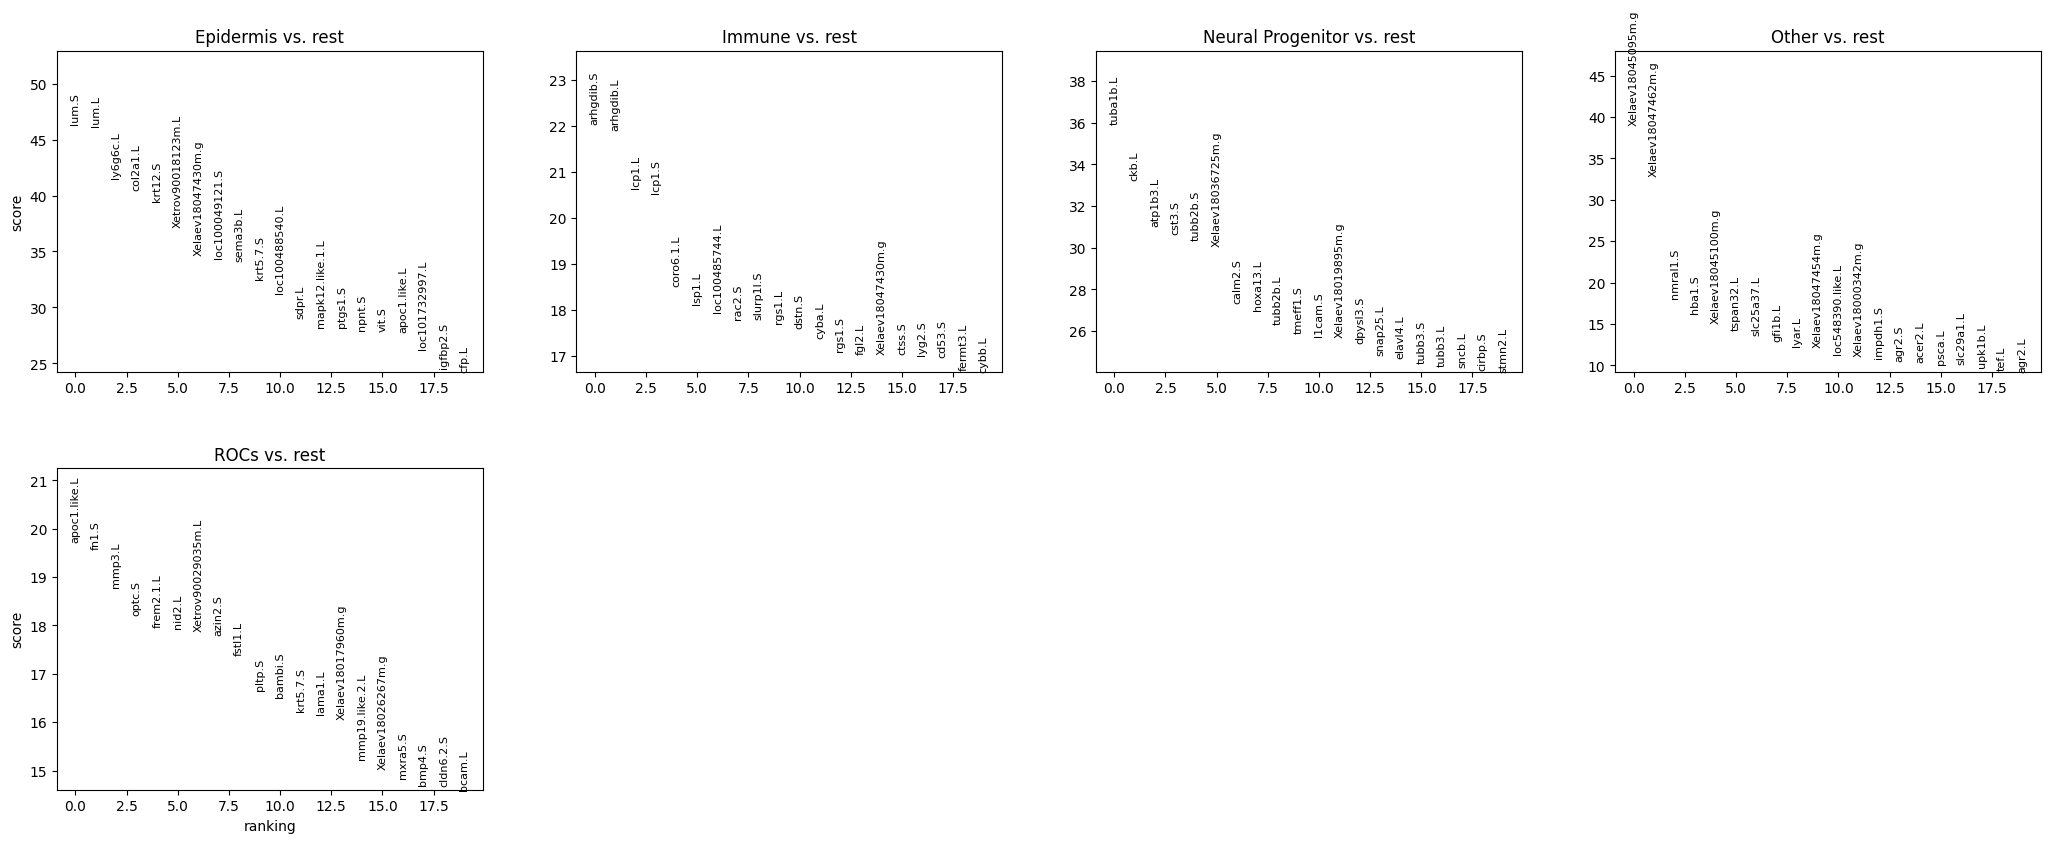

In [94]:
# Perform Wilcoxon rank-sum test to identify marker genes for each main category
sc.tl.rank_genes_groups(hvg_adata_0dpa_scaled, groupby='main_category', method='wilcoxon', key_added='wilcoxon_main_category')

# Visualize the top marker genes for each main category identified by Wilcoxon test
sc.pl.rank_genes_groups(hvg_adata_0dpa_scaled, key='wilcoxon_main_category', n_genes=20, sharey=False, title='Top Marker Genes for Main Categories (Wilcoxon Test)')

In [114]:
# Extract the top marker genes identified by Wilcoxon test for each category
marker_genes_wilcoxon = pd.DataFrame(hvg_adata_0dpa_scaled.uns['wilcoxon_main_category']['names']['ROCs']).head(50)
print("Top Marker Genes for ROCs (Wilcoxon Test):")
print(marker_genes_wilcoxon)

Top Marker Genes for ROCs (Wilcoxon Test):
                    0
0        apoc1.like.L
1               fn1.S
2              mmp3.L
3              optc.S
4           frem2.1.L
5              nid2.L
6   Xetrov90029035m.L
7             azin2.S
8             fstl1.L
9              pltp.S
10            bambi.S
11           krt5.7.S
12            lama1.L
13  Xelaev18017960m.g
14     mmp19.like.2.L
15  Xelaev18026267m.g
16            mxra5.S
17             bmp4.S
18          cldn6.2.S
19             bcam.L
20            egfl6.L
21             bmp4.L
22           ly6g6c.L
23            lamc1.S
24            lamc1.L
25             vcan.L
26            ccdc3.L
27            krt18.L
28             vwa2.S
29            lpar3.L
30            krt12.S
31            prdm1.L
32           igfbp2.S
33           bhlha9.S
34           efemp2.L
35              lum.L
36             bmp2.L
37            ptgs1.S
38            hmcn1.L
39             vwde.L
40              sp9.L
41             fgf7.L
42         

In [117]:
import pandas as pd

# Extract the top marker genes for ROCs from both methods
marker_genes_logreg_rocs = [
    'lpar3.L', 'Xelaev18009367m.g', 'Xelaev18047608m.g', 'slc29a1.L', 'bmp2.L',
    'Xetrov90029035m.L', 'atp6v1e1.S', 'dkk1.L', 'optc.S', 'loc100127750.S',
    'frem2.1.L', 'bmp4.S', 'cyp26c1.L', 'Xelaev18045100m.g', 'fstl1.L', 'nid2.L',
    'Xelaev18026267m.g', 'fn1.S', 'krt16.S', 'ptgs1.S', 'sema3f.L', 'tgfb1.L',
    'mafb.L', 'Xetrov90011359m.L', 'pltp.S', 'golim4.S', 'rab6a.L', 'cpa6.L',
    'Xelaev18017960m.g', 'Xelaev18044182m.g', 'loc100497154.S', 'fam26d.L',
    'azin2.S', 'fn1.L', 'tmod4.S', 'snai2.L', 'ifit5.L', 'mmp19.like.2.L',
    'sp9.L', 'prdm1.S', 'bambi.S', 'Xelaev18041402m.g', 'oaf.L', 'capn13.L',
    'loc100049121.S', 'egfl6.L', 'loc100497103.S', 'dkk1.S', 'ppp1r3c.2.S', 'tgfb1.S'
]

marker_genes_wilcoxon_rocs = [
    'apoc1.like.L', 'fn1.S', 'mmp3.L', 'optc.S', 'frem2.1.L', 'nid2.L',
    'Xetrov90029035m.L', 'azin2.S', 'fstl1.L', 'pltp.S', 'bambi.S', 'krt5.7.S',
    'lama1.L', 'Xelaev18017960m.g', 'mmp19.like.2.L', 'Xelaev18026267m.g',
    'mxra5.S', 'bmp4.S', 'cldn6.2.S', 'bcam.L', 'egfl6.L', 'bmp4.L', 'ly6g6c.L',
    'lamc1.S', 'lamc1.L', 'vcan.L', 'ccdc3.L', 'krt18.L', 'vwa2.S', 'lpar3.L',
    'krt12.S', 'prdm1.L', 'igfbp2.S', 'bhlha9.S', 'efemp2.L', 'lum.L', 'bmp2.L',
    'ptgs1.S', 'hmcn1.L', 'vwde.L', 'sp9.L', 'fgf7.L', 'snai2.L', 'plk2.L',
    'enpp2.S', 'mapk12.like.1.L', 'emilin1.L', 'dlx3.S', 'msx2.S', 'cpa6.L'
]

# Convert lists to sets for easier comparison
set_logreg_rocs = set(marker_genes_logreg_rocs)
set_wilcoxon_rocs = set(marker_genes_wilcoxon_rocs)

# Find overlapping genes
overlapping_genes_rocs = set_logreg_rocs.intersection(set_wilcoxon_rocs)
print(f"Overlapping Marker Genes for ROCs (Logistic Regression and Wilcoxon): {overlapping_genes_rocs}")

# Optional: Convert to a DataFrame for easier visualization
overlapping_genes_df = pd.DataFrame(list(overlapping_genes_rocs), columns=['Overlapping Marker Genes for ROCs'])
print(overlapping_genes_df)

Overlapping Marker Genes for ROCs (Logistic Regression and Wilcoxon): {'snai2.L', 'nid2.L', 'egfl6.L', 'azin2.S', 'pltp.S', 'lpar3.L', 'cpa6.L', 'Xetrov90029035m.L', 'Xelaev18017960m.g', 'bambi.S', 'frem2.1.L', 'optc.S', 'fn1.S', 'Xelaev18026267m.g', 'ptgs1.S', 'bmp2.L', 'fstl1.L', 'bmp4.S', 'sp9.L', 'mmp19.like.2.L'}
   Overlapping Marker Genes for ROCs
0                            snai2.L
1                             nid2.L
2                            egfl6.L
3                            azin2.S
4                             pltp.S
5                            lpar3.L
6                             cpa6.L
7                  Xetrov90029035m.L
8                  Xelaev18017960m.g
9                            bambi.S
10                         frem2.1.L
11                            optc.S
12                             fn1.S
13                 Xelaev18026267m.g
14                           ptgs1.S
15                            bmp2.L
16                           fstl1.L
17            

In [120]:
provided_genes_list = [
    'wnt5a', 'loc100488523', 'loc100492954', 'egfl6', 'lpar3', 'cpa6', 'sp9', 'fgf9',
    'fbn2', 'tinagl1', 'fgf7', 'vwde', 'lef1', 'lamb2', 'fgfr4', 'fgf7', 'rspo2', 'cpa6',
    'loc100498358', 'krt', 'loc100486832', 'jag1', 'Xelaev18043128m', 'dlx2', 'tp73',
    'gdf6', 'Xelaev18046800m', 'nid2', 'igfbp2', 'ism2', 'dlx2', 'loc100493805', 'frem2',
    'Xelaev18044182m', 'bmp5', 'tspear', 'sema3f', 'robo4', 'jchain', 'rspo2', 'adamts18',
    'pltp', 'Xelaev18034799m', 'lamb1', 'lamb1', 'unc5b', 'mmp28', 'fgf10', 'pzp', 'galnt15'
]

# Convert the provided list to a set for easier comparison
set_provided_genes = set(provided_genes_list)

# Find overlapping genes between the provided list and previously identified ROCs marker genes
final_overlapping_genes_logreg = set_provided_genes.intersection(set_logreg_rocs)
final_overlapping_genes_logreg

set()

Logreg and table 3 overlapping:



1. egfl6

2. lpar3

3. cpa6

4. sp9

5. nid2

6. frem2

7. pltp

8. sema3f

Wilcoxon and table 3 overlapping:

	1.	egfl6
	2.	lpar3
	3.	cpa6
	4.	sp9
	5.	nid2
	6.	pltp
	7.	frem2
	8.	fgf7
	9.	vwde
	10.	bmp2
	11.	snai2
	12.	optc

Table 3 and Both Methods overlapping:

	1.	egfl6
	2.	lpar3
	3.	cpa6
	4.	sp9
	5.	nid2
	6.	pltp
	7.	frem2